## Getting Data 

In [1]:
import pandas as pd
import numpy as np

## AAPL DATA

In [2]:
data2 = pd.read_csv('AAPL.csv')

In [3]:
data2['Adj Close'].isnull().sum()

1

In [4]:
data2.dropna(inplace=True)

In [5]:
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


In [6]:
data2.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9.744000e+03
mean,28.756519,29.033278,28.466649,28.755930,26.938004,8.668763e+07
std,50.554982,50.996655,50.112409,50.563243,48.858499,8.640497e+07
min,0.198661,0.198661,0.196429,0.196429,0.157070,3.472000e+05
25%,1.060602,1.080357,1.037857,1.060714,0.915450,3.356662e+07
50%,1.690357,1.725715,1.660714,1.694643,1.452018,5.849950e+07
75%,28.424643,28.696786,28.022143,28.302499,24.793811,1.082242e+08
max,230.779999,233.470001,229.779999,232.070007,229.392090,1.855410e+09


## Imports 

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
import time

In [8]:
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.410525,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.389106,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.360548,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.369472,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.380182,18362400.0


## Windowing with size = 10

In [9]:
df = pd.DataFrame(data2['Adj Close'])

In [10]:
df['Predictions'] = df['Adj Close'].shift(-10)

In [11]:
x = df['Adj Close']

In [12]:
x = x[:-10]

In [13]:
y = np.array(df['Predictions'])

In [14]:
y = y[:-10]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

## Training Different Model 

In [16]:
svr_linear = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', degree = 2, C = 1e3)
svr_rbf = SVR(kernel = 'rbf', gamma = 0.1, C = 1e3)

In [17]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

## Optimization using GridSearchCV 

In [18]:
parameters = {'kernel': ['linear', 'rbf'], 'C':[100,1000]} 

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
svr = SVR()

In [21]:
clf = GridSearchCV(svr, param_grid=parameters, n_jobs=-1, cv = 5)

In [22]:
clf.fit(x_train, y_train) 

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [100, 1000], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
clf.best_params_

{'C': 100, 'kernel': 'linear'}

## Optimal Model 

In [24]:
svr_optimal = SVR(kernel = 'linear', C = 100 )

In [25]:
start = time.time()
svr_optimal.fit(x_train, y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
predictions = svr_optimal.predict(x_test)

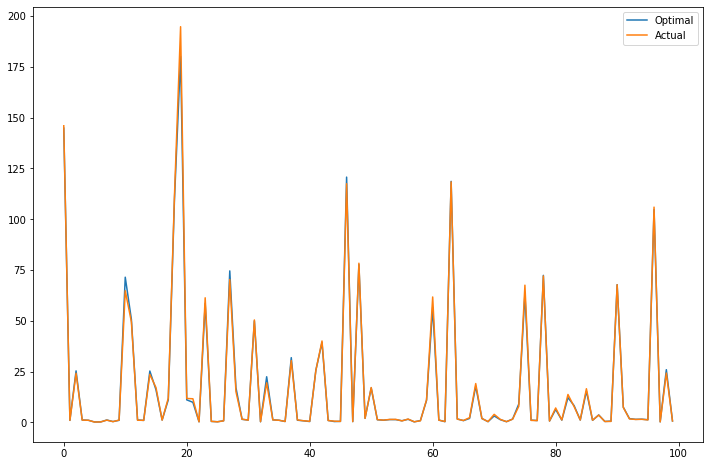

In [27]:
fig = plt.figure(figsize = (12,8))
plt.plot(predictions[:100], label = 'Optimal')
plt.plot(y_test[:100], label = 'Actual')
plt.legend()

In [28]:
mean_absolute_error(y_test, predictions)

1.0789042003701774

In [29]:
mean_squared_error(y_test, predictions)

8.08707384303651

## Fitting Model

In [30]:
svr_linear.fit(x_train, y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

svr_poly.fit(x_train, y_train)

In [31]:
svr_rbf.fit(x_train, y_train)

C:\Users\kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [32]:
pred2 = svr_rbf.predict(x_test)

In [33]:
pred = svr_linear.predict(x_test)

pred3 = svr_poly.predict(x_test)

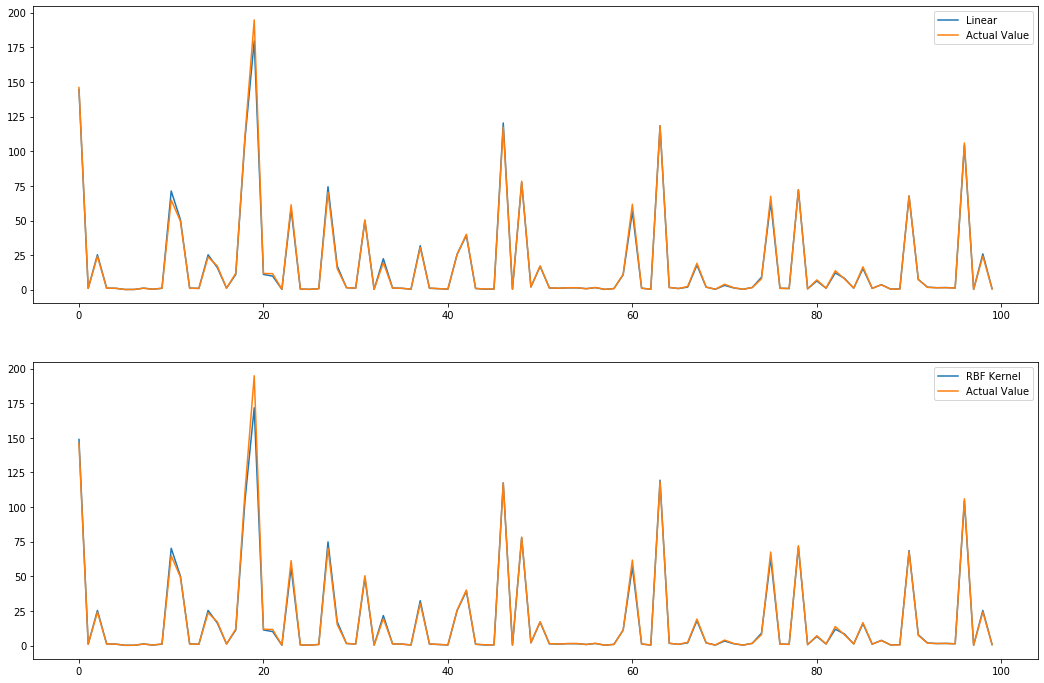

In [34]:
fig,ax = plt.subplots(2,1,figsize = (18,12))
ax[0].plot(pred[:100], label = 'Linear')
ax[0].plot(y_test[:100], label = 'Actual Value')
ax[0].legend()

ax[1].plot(pred2[:100], label = 'RBF Kernel')
ax[1].plot(y_test[:100], label = 'Actual Value')


ax[1].legend()

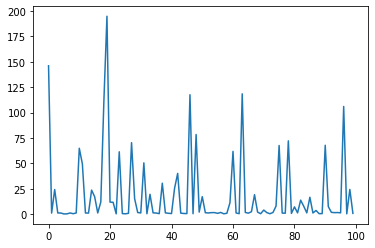

In [35]:

plt.plot(y_test[:100], label = 'Actual Value')
 

axes = plt.gca()
plt.plot(pred3[:100])


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mean_squared_error(y_test, pred)

8.069747716618085

In [39]:
mean_squared_error(y_test, pred2)

8.774571144623827

In [40]:
mean_absolute_error(y_test, pred)

1.0794815350880416

In [41]:
mean_absolute_error(y_test, pred2)

1.0384283115860997

mean_squared_error(y_test, pred3)

mean_absolute_error(y_test, pred3)

In [43]:
svr_linear.predict([[.410525]])

array([0.41854382])

In [44]:
svr_rbf.predict([[.410525]])

array([0.42484761])